# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [7]:
data.shape

(4870, 65)

In [13]:
sns.set(palette='dark', color_codes=True, context='notebook', style='darkgrid', font='sans-serif', \
        font_scale=1.5, rc=None)

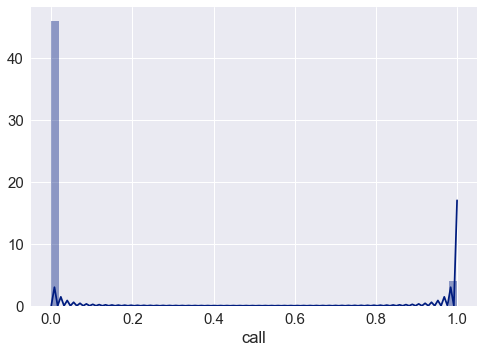

In [37]:
sns.distplot(data.call)

### The distribution of callbacks in a bernoulli distribution...as seen above

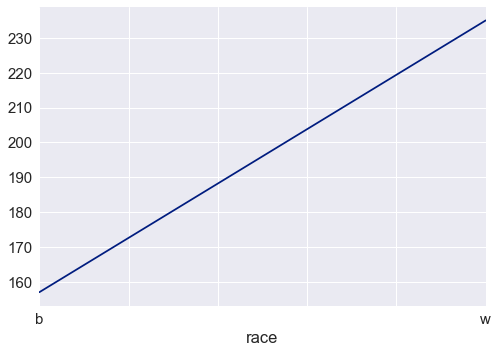

In [31]:
data.call.groupby(data.race).sum().sort_index().plot()

In [33]:
norm_test = stats.normaltest(data.call)
norm_test

NormaltestResult(statistic=2983.7124822406331, pvalue=0.0)

## Above function tests the null hypothesis that a sample comes from a normal distribution. 
### As noticed the p-value is low thus we need to reject the null hypothesis as the chances of it being true are slim

In [34]:
n1 = data.call[0:200]
stats.ttest_1samp(n1, data.call.mean())

Ttest_1sampResult(statistic=-2.4152329024337353, pvalue=0.016629173296953657)

In [51]:
# Count of blacks and whites
b_w_cnt = data.call.groupby(data.race).size()
type(b_w_cnt)
b_w_cnt[0], b_w_cnt[1]

# callbacks by race (sum() can be used since callback yes = 1 and callback no = 0)
cb_cnt_by_race = data.call.groupby(data.race).sum()
print(callback_cnt)
sum_b = sum(data[data.race=='b'].call) # number of callbacks for black-sounding names
sum_b

cb_rate_b, cb_rate_w= cb_cnt_by_race[0]/b_w_cnt[0], cb_cnt_by_race[1]/b_w_cnt[1]
cb_rate_b, cb_rate_w

race
b    157.0
w    235.0
Name: call, dtype: float32


(0.064476386036960986, 0.096509240246406572)

### According to http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf
## Certain conditions must be met to use the CLT.
#### ● The samples must be independent
#### ● The sample size must be “big enough”
> However,  The sample size must not be bigger than 10% of the entire population 
>> We have 2435 balcks and whites in the sample which is not more than 10% of total population in US

###  z-statistic instead of t-stats since samp size is >= 30

### 2. What are the null and alternate hypotheses?

Null Hypothesis (Ho): callback_rate_white - callback_rate_black = 0

Alternative Hypothesis (Ha):  callback_rate_white - callback_rate_black != 0



### 3. Compute margin of error, confidence interval, and p-value.

In [80]:
# Standard Error --> SE, Margin of error --> ME
p_hat = cb_rate_w - cb_rate_b
SE = np.sqrt(p_hat*(1-p_hat)/sum(b_w_cnt)) # or simply divide phat*(1-phat) by n or total sample size
ME = 2*SE
print('SE = {0:0.4f}, ME = {1:0.4f}'.format(SE, ME))

# CI 
CI_low = p_hat - 2*SE
CI_up = p_hat + 2*SE
print('CI_lower: {0:0.5f}, CI_upper: {1:0.5f}'.format(CI_low, CI_up))

# Z
P_population = 0
Z = (p_hat - P_population)/SE
print('z-stat:',Z)

SE = 0.0025, ME = 0.0050
CI_lower: 0.02699, CI_upper: 0.03708
z-stat: 12.6949791137


## Let's try to guess the p-value:
### 1. Z-stat is very high which points to null hypothesis likely getting rejected or that the difference in callback rate for whites and blacks is not Zilch!
> since z-stat is hi, most likely p value is going to be low
>> Since Ho is rejected, we are certain that p-value will be less than 0.05 !!!!!!!!!!!
### 2. Look at the CI_lower...its 0.02699, so that chance that Ho will be true or that the rate diff will be 0 is very small and that prob will lie outside the 95% CI since 0 is to the left of CI_lower (0.02699). Lets see what p_hat - 3* SE gives us --> 0.02446. 
> So now we can say that prob of Ho coming true is ouside 3 sigma or 99.7% or in other words less than .3% or less than 0.05
>> since z-score is way bigger than 2.58, the p-value will be way smaller than 0.01 !!!!!!!!!

## 4. Write a story describing the statistical significance in the context or the original problem.

> The diff b/w callback rates for whites and black is not zero.
>>Per 95% CI the difference is going to be b/w CI_lower: 0.02699, CI_upper: 0.03708
>>> p-value is extremely small ~ < 0.01

# Race has a significant impact on the rate of callbacks for resumes.


## 5. Does this analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how could this analysis be amended?

### According to the above analysis, Race is ONE of the factors. However, there are other factors that should also be studied from this data set. 

> As Allen Downey has said, we need to study the effect size as the most importnat distinguishing factor rather than replying on p-values and therefore we need to study the effect size for other parameters to compare against the effect size for race to determine the answer to this question

>> Would also be valuable to calculate the Cohen's d in the follow on studies!